# Basic Graphics in MsPASS
## *Prof. Gary L. Pavlis, Earth and Atmospheric Sciences, Indiana University*
## Introduction
This tutorial will introduce you to some basic graphics capabilities in MsPASS.  Like obspy our graphics module is based on matplotlib's pyplot module.   Obspy more or less advises the user utilize matplotlib graphics directly to build matlab like plots for visualization.   To aid users we created a simple set of graphics classes in python that make plotting all standard mspass data objects much simpler.  For all such data objects that step can be as simple a creating an instance of the plotting class and then calling it's plot method.   This tutorial demonstrates that functionality for all four MsPASS data object types (TimeSeries, Seismogram, TimeSeriesEnsemble, and SeismogramEnsemble) with the two different plot types:  SeismicPlotter and SectionPlotter.   This tutorial uses only simulation data with Ricker wavelets.  Other tutorials show examples with real data.

First we need to do some initialization needed to run this tutorial.   Run the following code block:

In [1]:
#import mspasspy.ccore as mspass # This is our recommended way to load the C++ core library
import numpy as np
import matplotlib.pyplot as pyplot
# This is the internal module used only for this tutorial
import graphicstutorial as tutorial
# We use these two objects in this tutorial so we use this shorthand for convenience
from mspasspy.graphics import SeismicPlotter
from mspasspy.graphics import SectionPlotter

 ## Displaying Data with SeismicPlotter
 ### Basic Plotting
 Most seismologists will likely prefer to plot their data with the class called SeismicPlotter.   It displays seismic data with time as the x-axis increasing in the normal way from left to right.  Later we will examine the companion class SectionPlotter that makes seismic reflection style plots with time on the y axis and reversed (time increases from top to bottom).  
 
The approach we use in MsPASS to graphics is very much object oriented.  We first create an instance of the class we call SeismicPlotter with this default construct:

In [2]:
plotter=SeismicPlotter()

This creates an instance of the plotting class SeismicPlotter that we associate with the python variable name plotter.  It is a normal class so you can view the docstring in the usual way.   Run the following block to see it, but don't worry about the details of the lengthy documentation this produces for now.   The point is that plotter is now an instance of a typical python object.  It contrasts with what we call a "data object" like Seismogram that abstracts a three-component seismogram.  Instead a SeismicPlotter abstracts the concept of a graphical system to plot native mspass data objects.

In [3]:
help(plotter)

Help on SeismicPlotter in module mspasspy.graphics object:

class SeismicPlotter(builtins.object)
 |  SeismicPlotter(scale=1.0, normalize=False, title=None)
 |  
 |  SeismicPlotter is used to plot mspass data objects in the
 |  seismology convention with time as the x axis.  Use SectionPlotter
 |  to plot data in the seismic reflection convention with time on the
 |  y axis and oriented backward (increasing downward).
 |  
 |  Four times of plots are supported:  wiggle trace, wiggle trace variable
 |  area (i.e. filled on positive peaks), image plots, and colored wiggle
 |  trace variable area (wtva overlays an image display).
 |  Ensembles of Seismogram objects (SeismogramEnsemble object) are plotted in
 |  three windows that will appear as Figure 0, Figure 1, and Figure 2.
 |  All other object are displayed in a single window.   Default display
 |  order for ensembles is fill in ensemble order from the bottom up.
 |  Use the topdown() method to switch to reverse order.
 |  
 |  This 

To see how this works let's first create a simple synthetic data ensemble. The small function below will create a TimeSeries ensemble with 20 members that have a linear moveout.     

In [4]:
ts=tutorial.makets()
d=tutorial.maketsens(ts)

This creates a simple ricker wavelet in the variable ts, which is actually a mspass.TimeSeries object.  We can plot tese data immediately like this:

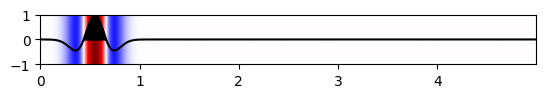

In [5]:
plotter.plot(ts)

and we can plot the ensemble created from this basic ricker synthetic with the exact same command but with d replacing the symbol ts.  That is:

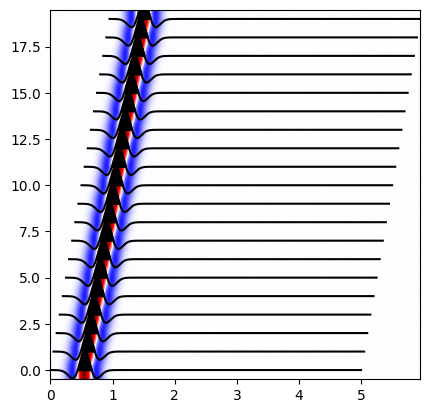

In [6]:
plotter.plot(d)

We currently support only one label that can be added directly, which is a title.   Below we add the title "First Plot" to the above:

In [ ]:
plotter.title="First Plot"
plotter.plot(d)

The SeismicPlotter class can produce four different styles of plots:  (1) wiggle trace only, (2) wiggle trace variable area, (3) image plot, and (4) wiggle trace variable area with an image plot overlay (the default seen above).   To switch styles use the change_style method.  The change_style method has one argument that is an abbreviation for the plot types listed.  They are:  wt, wtva, img, and wtvaimg respectively.  Run the following block to better see what these symbols mean:

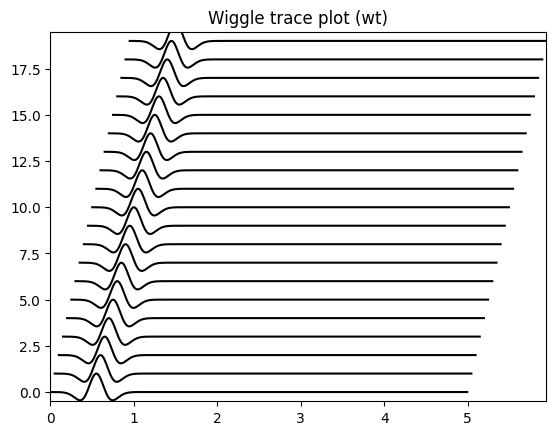

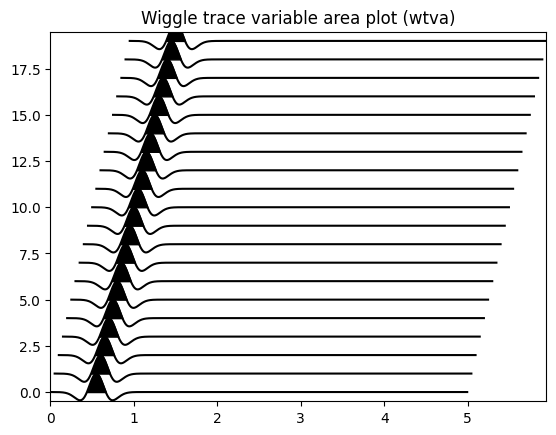

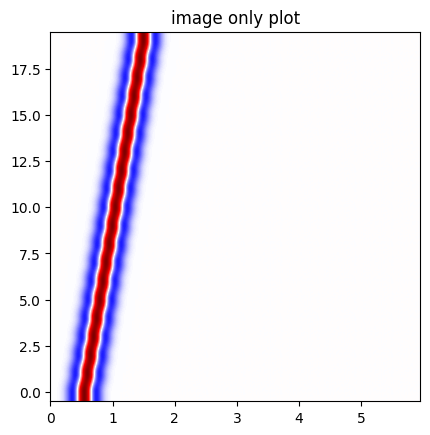

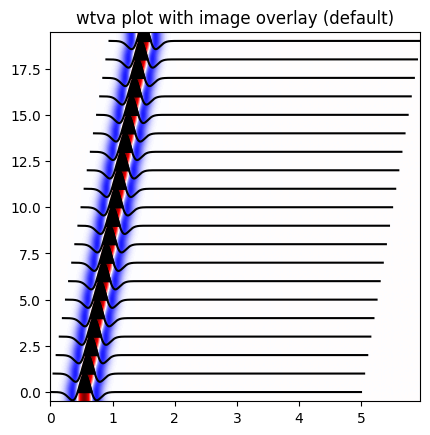

In [7]:
plotter.change_style('wt')
plotter.title='Wiggle trace plot (wt)'
plotter.plot(d)
pyplot.show()
plotter.change_style('wtva')
plotter.title='Wiggle trace variable area plot (wtva)'
plotter.plot(d)
pyplot.show()
plotter.change_style('img')
plotter.title='image only plot'
plotter.plot(d)
pyplot.show()
plotter.change_style('wtvaimg')
plotter.title='wtva plot with image overlay (default)'
plotter.plot(d)
pyplot.show()

We have seen how this plot engine can plot single TimeSeries and TimeSeriesEnsemble data.  It can also plot single Seismogram and SeismogramEnsemble data objects.  How to display three component data and ensembles of three component data has some choices we have made that are locked into the SeismicPlotter engine.  Run the next block to create a single three component seismogram (Seismogram object):

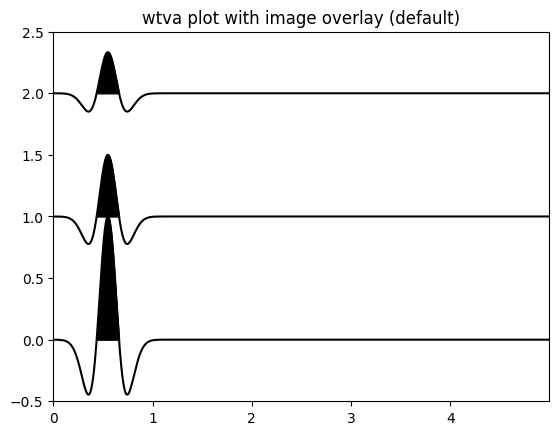

In [8]:
seis=tutorial.makeseis()
plotter.change_style('wtva')
plotter.plot(seis)

Notice the components are displayed on the y axis as centered at 0, 1, and 2.  The order corresponds to component number 0, 1, and 2 of the Seismogram plotted (normally EW, NS, and Z if oriented to a geographic reference but the Seismogram object allows the data to be in any reference frame that does not use a singular transformation matrix.  

SeismogramEnsembles present a similar order of presentation problem.  The SeismicPlotter class current implements only one approach which is to plot each ensemble component in three separate windows.   Running the following code block to see what we mean by that statement:

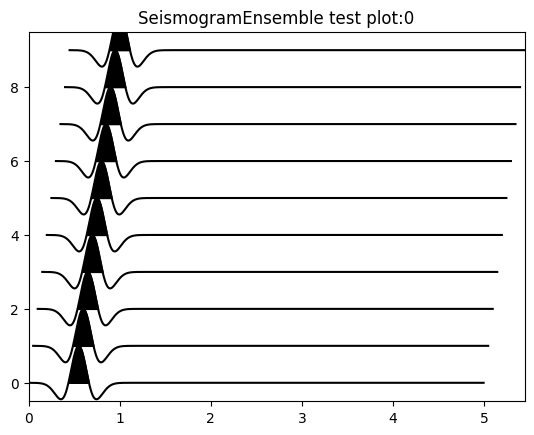

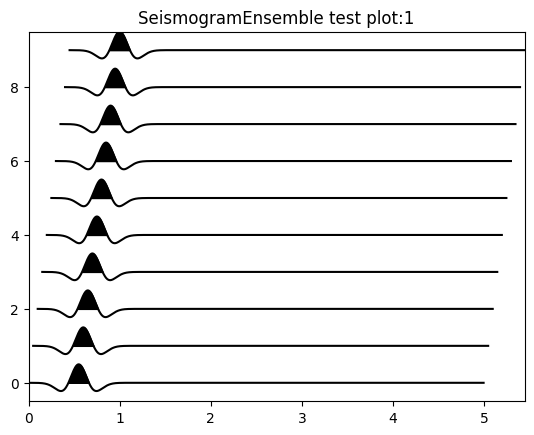

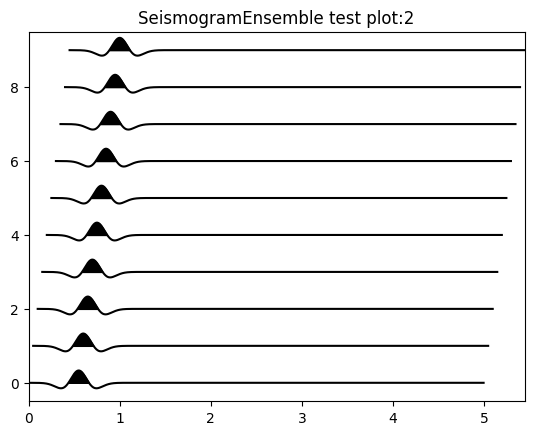

In [9]:
ens3c=tutorial.makeseisens(seis,n=10)
plotter.title='SeismogramEnsemble test plot'
plotter.change_style('wtva')  # Change wtva to make amplitude difference between windows clearer
plotter.plot(ens3c)

We intentionally reduced the size of the ensemble to 10 to show a default feature of these plots.  All three windows are plotted at a common scale.  The makeseisens function simply creates 10 time-shifted copies of seis to create this ensemble.  The component amplitudes are scaled by 1, 1/2 and 1/3 for 0, 1, and 2 respectively.  The amplitudes in these plots reflect that difference.   

### Class Level Plotting Control
The SeismicPlotter class has four attributes that control the basic appearance of the plots generated that are independent of the style chosen.  These are:
1.  *normalize* is a boolean.  When set True the data are normalized before plotting to improve the visual display.  When False no scaling is done.
2.  *scale* can be used to adjust the gain up or down in combination with normalize.  (see examples below)
3.  *color_map* is the pyplot name of a color map to use for image plots.  
4.  *fill_color* is a pyplot color code to use for the fill color for variable area shading
5.  By default ensembles are plotted with in order filling the frame from the bottom upward.  This can be switched to fill from top to bottom by calling the *topdown* method and it can be restored by calling the inverse *bottomup* method.

We illustrate these with small code segments below.  First, we illustrate the use of normalize and scale. We create a new 10 element TimeSeriesEnsemble and scale each member by a linearly increasing scale factor created by multiplying each trace by the member number + 1.  The script then plots the ensemble to illustrate the amplitude problem it creates for the plot.   

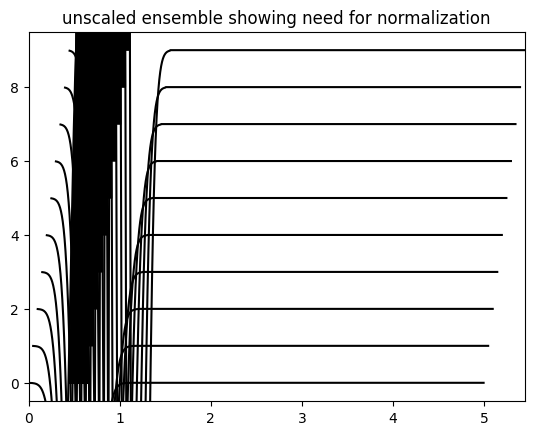

In [10]:
ens=tutorial.maketsens(ts,n=10)
for i in range(10):
    for j in range(ens.member[i].npts):
        ens.member[i].data[j] *= 10.0*float(i+1)
plotter.title='unscaled ensemble showing need for normalization'
plotter.plot(ens)

To get rid of the excessive clipping we rerun the plot with normalize set true.  

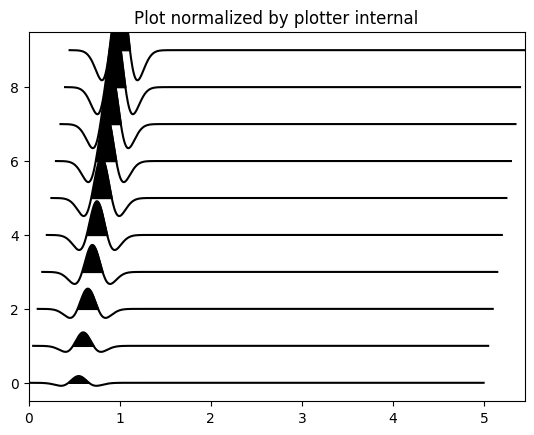

In [11]:
plotter.normalize=True
plotter.title='Plot normalized by plotter internal'
plotter.plot(ens)

Scale is used to reduce the overall gain level.  The default assumes the data are scaled to have values of order 1.0.   Setting *scale* less than one will reduce the overall amplitude and setting it greater than one will to increase the overall amplitude.  Here is an example with the same data as above but with scale set to 0.5.

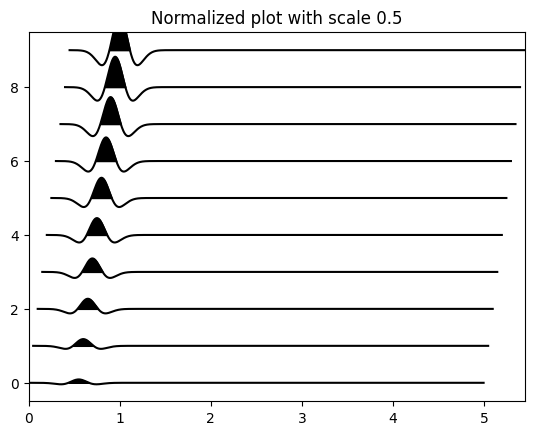

In [12]:
plotter.scale=0.5
plotter.title='Normalized plot with scale 0.5'
plotter.plot(ens)

The *normalize* and *scale* attributes in SeismicPlotter have fixed scaling properties, but have the advantage of not altering the input data.  An alternative is to use the amplitude scaling function *scale* in mspass.  *scale* has a number of options for different scaling metrics and approaches.  That function does, however, alter the data amplitude using the *calib* Metadata value to retain the original absolute amplitude.  Here is an example using scale to do an rms scale scaling with a single gain applied to the entire section:

computed section gain= {'amplitude': 54.772256}


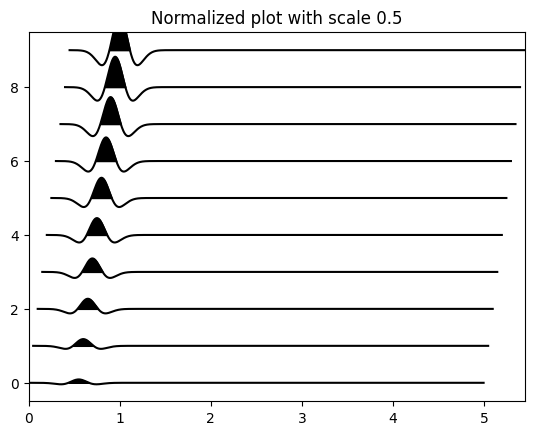

In [13]:
from mspasspy.algorithms.window import scale
amp=scale(ens,scale_by_section=True)
print('computed section gain=',amp)
plotter.plot(ens)

Alternatively, we can use individual trace scaling with a different metric.  Here is an example using rms scaling:

Vector of computed amplitudes for each signal= {'amplitude': 54.772256}


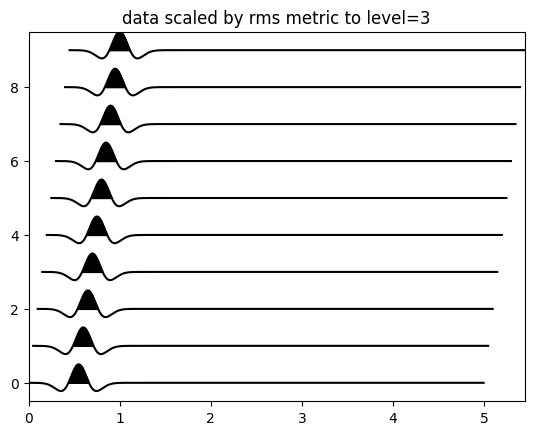

In [14]:
amps=scale(ens,method='rms',scale_by_section=False,level=3.0)
print('Vector of computed amplitudes for each signal=',amps)
plotter.title='data scaled by rms metric to level=3'
plotter.plot(ens)

Note you can experiment with varying the *level* parameter to vary the overall amplitude level of the plot.   Repeated calls to scale illustrate how the data are altered by the scaling function.  

SeismicPlotter has two color related attributes called *color_map* and *fill_color*.   Because these attributes are dependent on the choice for plot style they are not accessible directly as attributes.  Instead both should only be set as arguments to change_style.  

To illustrate this point, here is an example to make an image plot of the rescaled data in the previous frame but using the 'jet' color map defined in pyplot:

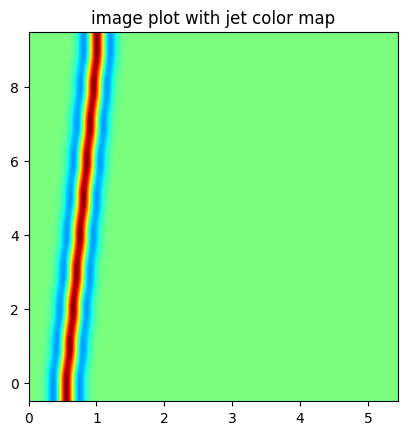

In [15]:
plotter.change_style('img',color_map='jet')
plotter.title='image plot with jet color map'
plotter.plot(ens)

Similarly, here is an example plotting these data with a wiggle trace variable area plot but with the positive shading in blue instead of the default black:

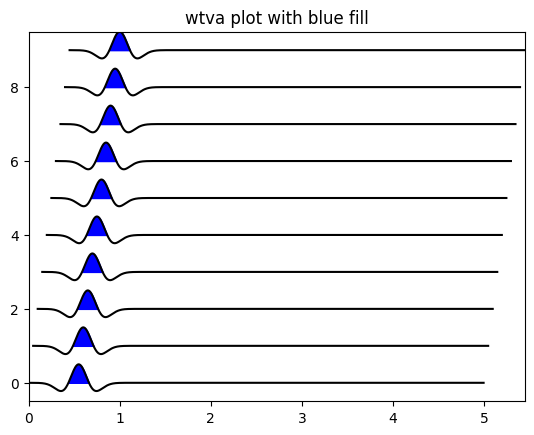

In [16]:
plotter.change_style('wtva',fill_color='b')
plotter.title='wtva plot with blue fill'
plotter.plot(ens)

Next we add an image background with a greyscale color map with a red fill (wtvaimg):

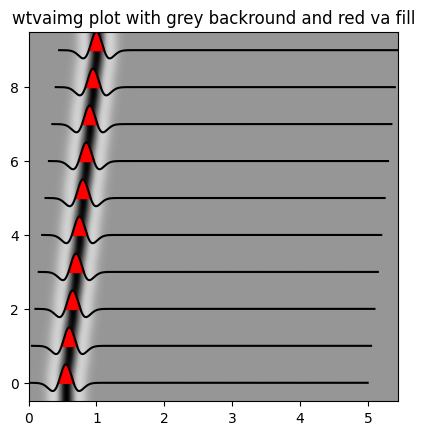

In [17]:
plotter.change_style('wtvaimg',fill_color='r',color_map='Greys')
plotter.title='wtvaimg plot with grey backround and red va fill'
plotter.plot(ens)

Finally, here is the same using the topdown method to reverse the data order:

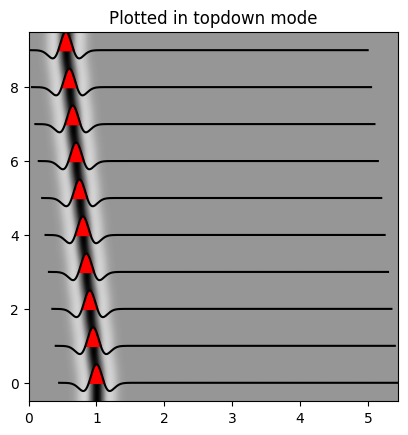

In [18]:
plotter.topdown()
plotter.title='Plotted in topdown mode'
plotter.plot(ens)

## Displaying Data with SectionPlotter 
Data can also be displayed in seismic reflection style plots where the vertical axis is time and time increases downward.   Such displays are necessary, for example, to plot things like receiver function images that are conceptually similar in many cases to a seismic reflection section.

The API is (mostly) the same for SectionPlotter and SeismicPlotter.   Here is an example plotting the same TimeSeriesEnsemble data as above but in SectionPlotter style.

[<Figure size 640x480 with 1 Axes>]

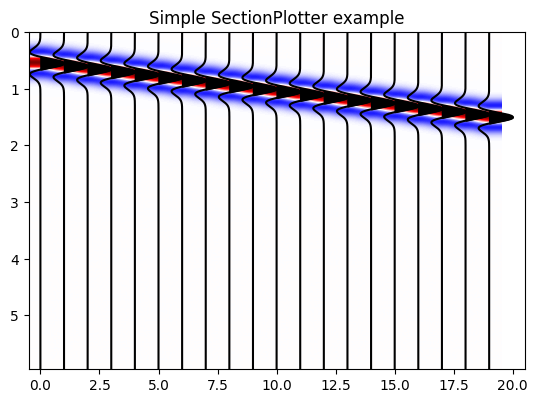

In [19]:
ts=tutorial.makets()
d=tutorial.maketsens(ts)
pl2=SectionPlotter()
pl2.title='Simple SectionPlotter example'
pl2.plot(d)

All the other api functions should behave the same.  For example, here is the same data plotted as an imageplot.

[<Figure size 640x480 with 1 Axes>]

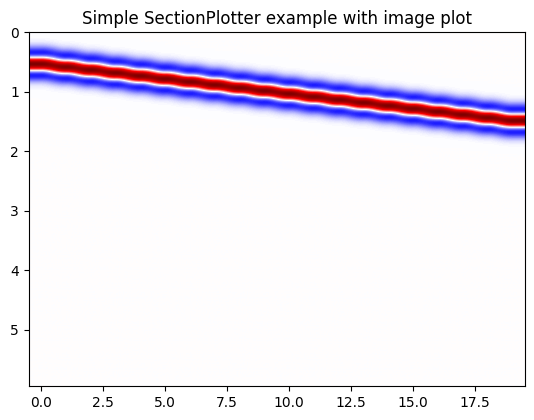

In [20]:
pl2.change_style('img')
pl2.title='Simple SectionPlotter example with image plot'
pl2.plot(d)

Here as wtva with default black fill:

[<Figure size 640x480 with 1 Axes>]

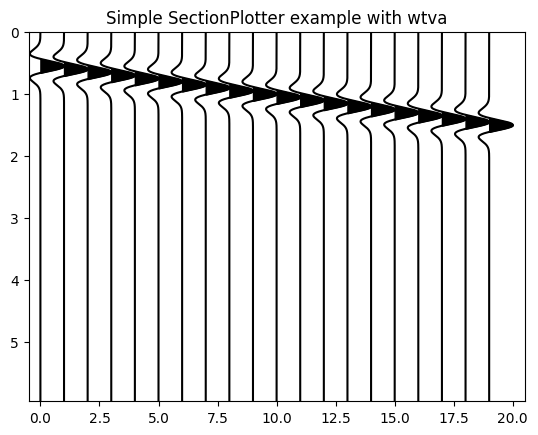

In [21]:
pl2.change_style('wtva')
pl2.title='Simple SectionPlotter example with wtva'
pl2.plot(d)